# Support Vector Machine (SVM) Classification on Breast Cancer Dataset

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.decomposition import PCA

sns.set(style="whitegrid")


## Load Breast Cancer Dataset

In [2]:

cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

print("Dataset shape:", X.shape)
print("Classes:", cancer.target_names)
print("Class distribution:", y.value_counts())


Dataset shape: (569, 30)
Classes: ['malignant' 'benign']
Class distribution: 1    357
0    212
Name: count, dtype: int64


## Exploratory Data Analysis

/tmp/ipykernel_12506/3251494193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


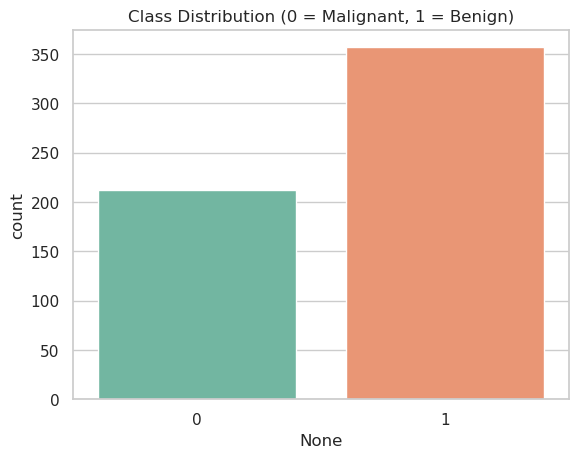

In [3]:

# Visualize class distribution
sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()


## Train-Test Split and Scaling

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train Support Vector Machine Models

In [5]:

# Linear Kernel
svm_linear = SVC(kernel="linear", probability=True, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# RBF Kernel
svm_rbf = SVC(kernel="rbf", probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

print("Linear Kernel Accuracy:", svm_linear.score(X_test_scaled, y_test))
print("RBF Kernel Accuracy:", svm_rbf.score(X_test_scaled, y_test))


Linear Kernel Accuracy: 0.9824561403508771
RBF Kernel Accuracy: 0.9766081871345029


## Model Evaluation

In [10]:

y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("Classification Report (Linear Kernel):\n", classification_report(y_test, y_pred_linear, target_names=cancer.target_names))
print("Classification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf, target_names=cancer.target_names))



Classification Report (Linear Kernel):
               precision    recall  f1-score   support

   malignant       0.98      0.97      0.98        64
      benign       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Classification Report (RBF Kernel):
               precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



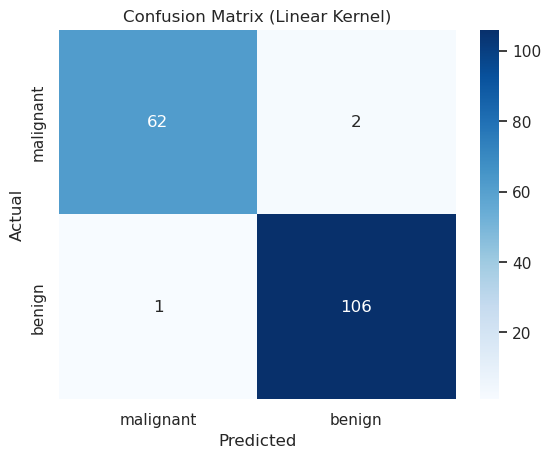

In [11]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title("Confusion Matrix (Linear Kernel)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ROC Curve & AUC

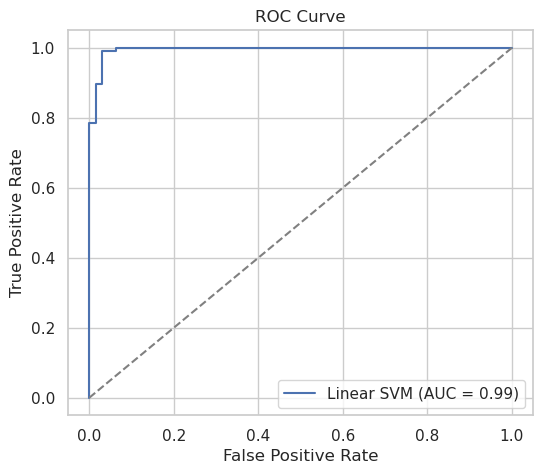

In [7]:

y_prob_linear = svm_linear.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_linear)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Linear SVM (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Actual vs Predicted (Line Plot)

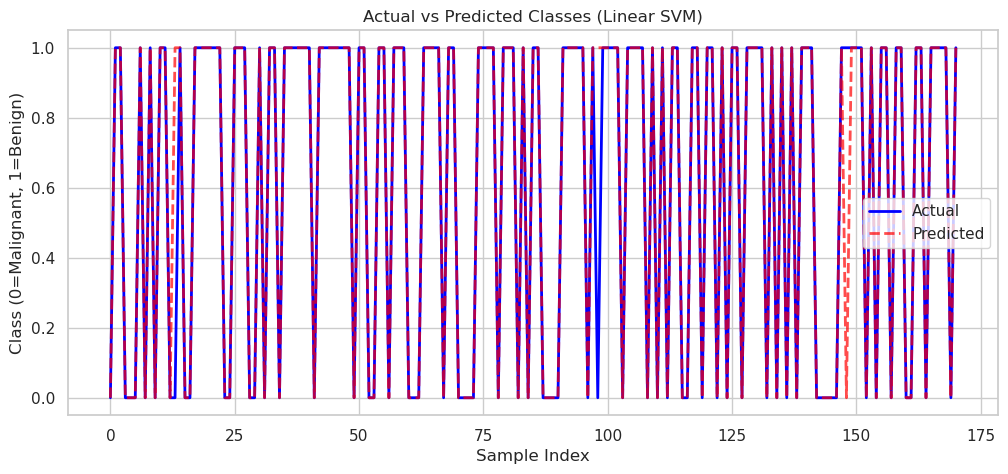

In [8]:

comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred_linear}).reset_index(drop=True)

plt.figure(figsize=(12,5))
plt.plot(comparison.index, comparison["Actual"], label="Actual", color="blue", linewidth=2)
plt.plot(comparison.index, comparison["Predicted"], label="Predicted", color="red", linestyle="--", linewidth=2, alpha=0.7)
plt.title("Actual vs Predicted Classes (Linear SVM)")
plt.xlabel("Sample Index")
plt.ylabel("Class (0=Malignant, 1=Benign)")
plt.legend()
plt.show()


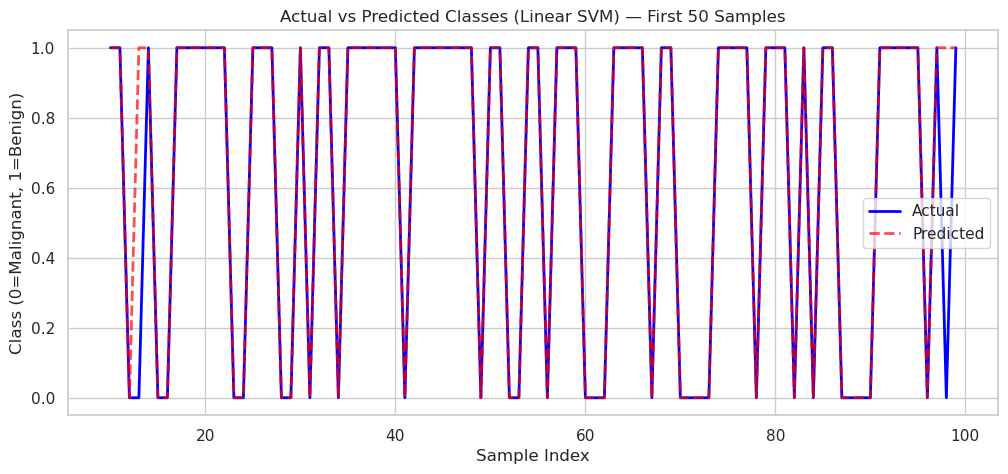

In [16]:
# Compare only a portion of test data (e.g., first 50 samples)
comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred_linear}).reset_index(drop=True)

subset = comparison.iloc[10:100]  # take first 50 samples

plt.figure(figsize=(12,5))
plt.plot(subset.index, subset["Actual"], label="Actual", color="blue", linewidth=2)
plt.plot(subset.index, subset["Predicted"], label="Predicted", color="red", linestyle="--", linewidth=2, alpha=0.7)
plt.title("Actual vs Predicted Classes (Linear SVM) — First 50 Samples")
plt.xlabel("Sample Index")
plt.ylabel("Class (0=Malignant, 1=Benign)")
plt.legend()
plt.show()


## PCA Projection with Decision Boundary

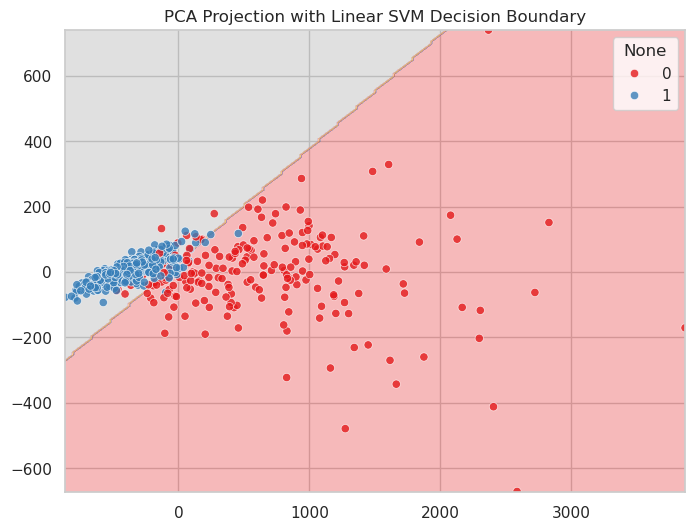

In [9]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

svm_pca = SVC(kernel="linear", probability=True, random_state=42)
svm_pca.fit(X_train_pca, y_train_pca)

xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 200),
                     np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 200))
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set1")
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set1", alpha=0.8)
plt.title("PCA Projection with Linear SVM Decision Boundary")
plt.show()
